In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statistics
%matplotlib inline

df = pd.read_csv("CEL.TA.csv")
df

,Daily Dates,Daily Closing Prices,Weekly Dates,Weekly Closing Prices,Monthly Dates,Monthly Closing Prices,Annually Dates,Annually Closing Prices
0,29/12/2022,1846.0,29/12/2022,1846.0,29/12/2022,1846.0,29/12/2022,1846.0
1,28/12/2022,1837.0,22/12/2022,1870.0,30/11/2022,1912.0,30/12/2021,1748.0
2,27/12/2022,1769.0,15/12/2022,1802.0,31/10/2022,1772.0,31/12/2020,1584.0
3,26/12/2022,1799.0,08/12/2022,1813.0,29/09/2022,1815.0,31/12/2019,1099.0
4,25/12/2022,1835.0,01/12/2022,1918.0,31/08/2022,2089.0,31/12/2018,2210.0
...,...,...,...,...,...,...,...,...
2690,04/01/2012,6410.0,NaN,NaN,NaN,NaN,NaN,NaN
2691,03/01/2012,6499.0,NaN,NaN,NaN,NaN,NaN,NaN
2692,02/01/2012,6393.0,NaN,NaN,NaN,NaN,NaN,NaN
2693,01/01/2012,6400.0,NaN,NaN,NaN,NaN,NaN,NaN


# Volatility based on Daily Closing Prices

In [2]:
daily = df[['Daily Dates', 'Daily Closing Prices']]
daily = daily.dropna()
daily

,Daily Dates,Daily Closing Prices
0,29/12/2022,1846.0
1,28/12/2022,1837.0
2,27/12/2022,1769.0
3,26/12/2022,1799.0
4,25/12/2022,1835.0
...,...,...
2690,04/01/2012,6410.0
2691,03/01/2012,6499.0
2692,02/01/2012,6393.0
2693,01/01/2012,6400.0


In [3]:
daily = df[['Daily Dates', 'Daily Closing Prices']]
daily.rename(columns={"Daily Dates": "Date", "Daily Closing Prices": "Closing stock price"}, inplace=True)
daily['Price relative'] = ""
for i in range(1, len(daily.Date)):
    daily['Price relative'][i] = daily['Closing stock price'][i]/daily['Closing stock price'][i-1]
daily['Daily Return'] = ""
for i in range(1, len(daily.Date)):
    daily['Daily Return'][i] = np.log(daily['Closing stock price'][i]/daily['Closing stock price'][i-1])
daily

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Date,Closing stock price,Price relative,Daily Return
0,29/12/2022,1846.0,,
1,28/12/2022,1837.0,0.995125,-0.004887
2,27/12/2022,1769.0,0.962983,-0.037719
3,26/12/2022,1799.0,1.016959,0.016817
4,25/12/2022,1835.0,1.020011,0.019814
...,...,...,...,...
2690,04/01/2012,6410.0,1.007862,0.007831
2691,03/01/2012,6499.0,1.013885,0.013789
2692,02/01/2012,6393.0,0.98369,-0.016445
2693,01/01/2012,6400.0,1.001095,0.001094


In [4]:
DailyVolatility = statistics.stdev(daily['Daily Return'][1:])
print("The daily volatility of Cellcom is: {:.2%}".format(DailyVolatility))

The daily volatility of Cellcom is: 2.55%


In [5]:
AnnualizedDailyVolatilityTradingDays = DailyVolatility*np.sqrt(252)
print("The annualized daily volatility of Cellcom measured in trading days is: {:.2%}".format(AnnualizedDailyVolatilityTradingDays))

The annualized daily volatility of Cellcom measured in trading days is: 40.50%


In [6]:
AnnualizedDailyVolatilityCalendarDays = DailyVolatility*np.sqrt(365)
print("The annualized daily volatility of Cellcom measured in calendar days is: {:.2%}".format(AnnualizedDailyVolatilityCalendarDays))

The annualized daily volatility of Cellcom measured in calendar days is: 48.74%


# Volatility based on Weekly Closing Prices

In [7]:
df1 = df.copy()
weekly = df1[['Weekly Dates', 'Weekly Closing Prices']]
weekly = weekly.dropna()
weekly

,Weekly Dates,Weekly Closing Prices
0,29/12/2022,1846.0
1,22/12/2022,1870.0
2,15/12/2022,1802.0
3,08/12/2022,1813.0
4,01/12/2022,1918.0
...,...,...
570,26/01/2012,5650.0
571,19/01/2012,5970.0
572,12/01/2012,6100.0
573,05/01/2012,6360.0


In [8]:
weekly = df1[['Weekly Dates', 'Weekly Closing Prices']]
weekly.rename(columns={"Weekly Dates": "Date", "Weekly Closing Prices": "Closing stock price"}, inplace=True)
weekly['Price relative'] = ""
for i in range(1, len(weekly.Date)):
    weekly['Price relative'][i] = weekly['Closing stock price'][i]/weekly['Closing stock price'][i-1]
weekly['Weekly Return'] = ""
for i in range(1, len(weekly.Date)):
    weekly['Weekly Return'][i] = np.log(weekly['Closing stock price'][i]/weekly['Closing stock price'][i-1])
weekly = weekly.dropna()
weekly

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Date,Closing stock price,Price relative,Weekly Return
0,29/12/2022,1846.0,,
1,22/12/2022,1870.0,1.013001,0.012917
2,15/12/2022,1802.0,0.963636,-0.037041
3,08/12/2022,1813.0,1.006104,0.006086
4,01/12/2022,1918.0,1.057915,0.0563
...,...,...,...,...
570,26/01/2012,5650.0,1.027273,0.026907
571,19/01/2012,5970.0,1.056637,0.055091
572,12/01/2012,6100.0,1.021776,0.021542
573,05/01/2012,6360.0,1.042623,0.04174


In [9]:
WeeklyVolatility = statistics.stdev(weekly['Weekly Return'][1:])
print("The weekly volatility of Cellcom is: {:.2%}".format(WeeklyVolatility))

The weekly volatility of Cellcom is: 6.22%


In [10]:
AnnualizedWeeklyVolatilityTradingWeeks = WeeklyVolatility*np.sqrt(52)
print("The annualized weekly volatility of Cellcom measured in trading weeks is: {:.2%}".format(AnnualizedWeeklyVolatilityTradingWeeks))

The annualized weekly volatility of Cellcom measured in trading weeks is: 44.86%


# Volatility based on Monthly Closing Prices

In [11]:
df2 = df.copy()
monthly = df2[['Monthly Dates', 'Monthly Closing Prices']]
monthly = monthly.dropna()
monthly

,Monthly Dates,Monthly Closing Prices
0,29/12/2022,1846.0
1,30/11/2022,1912.0
2,31/10/2022,1772.0
3,29/09/2022,1815.0
4,31/08/2022,2089.0
...,...,...
128,30/04/2012,4735.0
129,29/03/2012,4698.0
130,29/02/2012,5128.0
131,31/01/2012,5441.0


In [12]:
monthly = df2[['Monthly Dates', 'Monthly Closing Prices']]
monthly.rename(columns={"Monthly Dates": "Date", "Monthly Closing Prices": "Closing stock price"}, inplace=True)
monthly['Price relative'] = ""
for i in range(1, len(monthly.Date)):
    monthly['Price relative'][i] = monthly['Closing stock price'][i]/monthly['Closing stock price'][i-1]
monthly['Monthly Return'] = ""
for i in range(1, len(monthly.Date)):
    monthly['Monthly Return'][i] = np.log(monthly['Closing stock price'][i]/monthly['Closing stock price'][i-1])
monthly = monthly.dropna()
monthly

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Date,Closing stock price,Price relative,Monthly Return
0,29/12/2022,1846.0,,
1,30/11/2022,1912.0,1.035753,0.035129
2,31/10/2022,1772.0,0.926778,-0.076041
3,29/09/2022,1815.0,1.024266,0.023977
4,31/08/2022,2089.0,1.150964,0.1406
...,...,...,...,...
128,30/04/2012,4735.0,1.721818,0.543381
129,29/03/2012,4698.0,0.992186,-0.007845
130,29/02/2012,5128.0,1.091528,0.087579
131,31/01/2012,5441.0,1.061037,0.059247


In [13]:
MonthlyVolatility = statistics.stdev(monthly['Monthly Return'][1:])
print("The monthly volatility of Cellcom is: {:.2%}".format(MonthlyVolatility))

The monthly volatility of Cellcom is: 13.42%


In [14]:
AnnualizedMonthlyVolatility = MonthlyVolatility*np.sqrt(12)
print("The annualized monthly volatility of Cellcom is: {:.2%}".format(AnnualizedMonthlyVolatility))

The annualized monthly volatility of Cellcom is: 46.48%


# Volatility based on Annually Closing Prices 

In [15]:
df3 = df.copy()
annually = df3[['Annually Dates', 'Annually Closing Prices']]
annually = annually.dropna()
annually

,Annually Dates,Annually Closing Prices
0,29/12/2022,1846.0
1,30/12/2021,1748.0
2,31/12/2020,1584.0
3,31/12/2019,1099.0
4,31/12/2018,2210.0
5,31/12/2017,3580.0
6,29/12/2016,3100.0
7,31/12/2015,2423.0
8,31/12/2014,3396.0
9,31/12/2013,4784.0


In [16]:
annually = df2[['Annually Dates', 'Annually Closing Prices']]
annually.rename(columns={"Annually Dates": "Date", "Annually Closing Prices": "Closing stock price"}, inplace=True)
annually['Price relative'] = ""
for i in range(1, len(annually.Date)):
    annually['Price relative'][i] = annually['Closing stock price'][i]/annually['Closing stock price'][i-1]
annually['Annual Return'] = ""
for i in range(1, len(annually.Date)):
    annually['Annual Return'][i] = np.log(annually['Closing stock price'][i]/annually['Closing stock price'][i-1])
annually = annually.dropna()
annually

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Date,Closing stock price,Price relative,Annual Return
0,29/12/2022,1846.0,,
1,30/12/2021,1748.0,0.946912,-0.054549
2,31/12/2020,1584.0,0.906178,-0.098519
3,31/12/2019,1099.0,0.693813,-0.365553
4,31/12/2018,2210.0,2.010919,0.698592
5,31/12/2017,3580.0,1.61991,0.48237
6,29/12/2016,3100.0,0.865922,-0.143961
7,31/12/2015,2423.0,0.781613,-0.246396
8,31/12/2014,3396.0,1.401568,0.337592
9,31/12/2013,4784.0,1.408716,0.342679


In [17]:
AnnualVolatility = statistics.stdev(annually['Annual Return'][1:])
print("The annual volatility of Cellcom is: {:.2%}".format(AnnualVolatility))

The annual volatility of Cellcom is: 42.03%


In [18]:
models = ['Annualized Daily Volatility by Trading Days','Annualized Daily Volatility by Calendar Days',
                'Annualized Weekly Volatility by Trading Weeks', 'Annualized Monthly Volatility',
                'Annual Volatility']
volatilities = [AnnualizedDailyVolatilityTradingDays,AnnualizedDailyVolatilityCalendarDays,
                AnnualizedWeeklyVolatilityTradingWeeks, AnnualizedMonthlyVolatility,
                AnnualVolatility]
new_volatilities = [f'{i*100:.2f}%' for i in volatilities]
compare_models = pd.DataFrame({ "Estimators": models, "Estimates": new_volatilities})
compare_models.sort_values(by = "Estimates", ascending = False)

,Estimators,Estimates
1,Annualized Daily Volatility by Calendar Days,48.74%
3,Annualized Monthly Volatility,46.48%
2,Annualized Weekly Volatility by Trading Weeks,44.86%
4,Annual Volatility,42.03%
0,Annualized Daily Volatility by Trading Days,40.50%


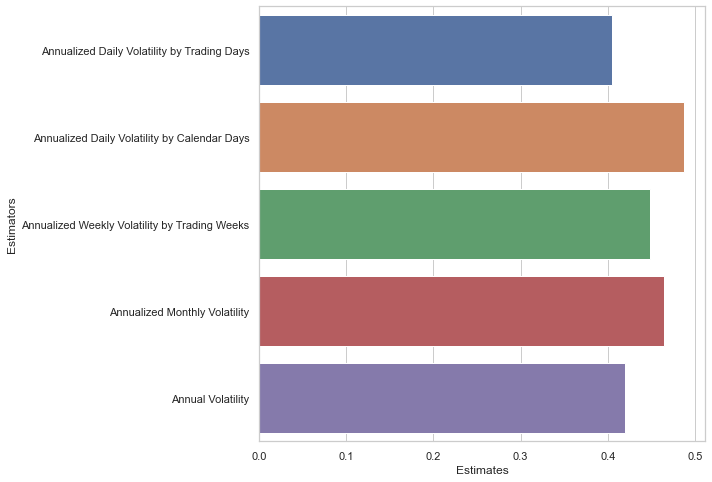

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
compare_models = pd.DataFrame({ "Estimators": models, "Estimates": volatilities})
sns.barplot(x = "Estimates", y = "Estimators", data = compare_models)
plt.show()